# Import Library & Upload data

In [1]:
import pandas as pd
from glob import glob
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

In [2]:
# Get a list of all CSV files in a directory
csv_files = glob('extracted_features/*.csv')

# Create an empty dataframe to store the combined data
data = pd.DataFrame()

# Loop through each CSV file and append its contents to the combined dataframe
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    data = pd.concat([data, df])

# Print the combined dataframe

# EDA Part

In [3]:
data.head(9)

,dwell_avg,flight_avg,traj_avg,keyboard_avg,mouse_avg,day_type,freq_mouse,freq_key,label
0,0.076065,0.975780,769.426581,0.828328,673.248259,0.0,7.0,63.0,1
1,0.072647,0.668800,510.113776,0.741447,510.113776,0.0,6.0,45.0,1
2,0.069570,0.646591,406.050055,0.716161,406.050055,0.0,7.0,45.0,1
3,0.070753,0.553134,638.027143,0.623887,638.027143,0.0,3.0,48.0,1
4,0.073334,0.722955,555.470869,0.796289,555.470869,0.0,4.0,51.0,1
5,0.071814,0.501777,665.193523,0.573591,665.193523,0.0,5.0,45.0,1
6,0.073400,0.566393,830.652425,0.639793,830.652425,0.0,2.0,46.0,1
7,0.075454,0.602034,458.507533,0.677488,458.507533,0.0,5.0,70.0,1
8,0.080204,0.631053,546.831136,0.711257,437.464909,0.0,4.0,51.0,1


In [4]:
len(data)

1760

In [5]:
data["label"].value_counts()

label
1    880
0    880
Name: count, dtype: int64

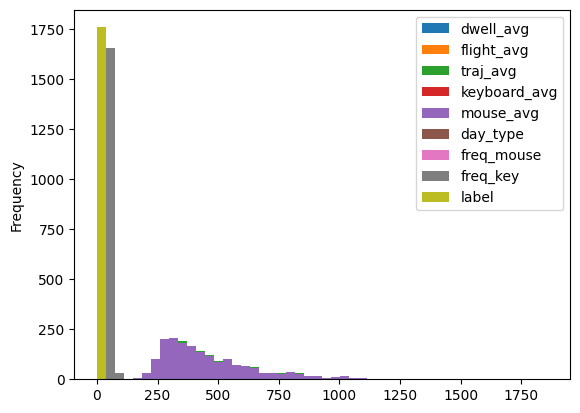

In [6]:
data.plot.hist(bins=50)
plt.show()

In [7]:
# calculate the corr
correlation = data.corr()
correlation

,dwell_avg,flight_avg,traj_avg,keyboard_avg,mouse_avg,day_type,freq_mouse,freq_key,label
dwell_avg,1.000000,0.212807,-0.207004,0.244630,-0.201533,-5.562126e-02,0.071887,-0.057050,2.633782e-02
flight_avg,0.212807,1.000000,-0.101507,0.958814,-0.116933,4.464992e-02,0.533938,0.236629,-8.527255e-03
traj_avg,-0.207004,-0.101507,1.000000,-0.105851,0.990362,7.795145e-03,-0.311188,-0.007171,-2.393195e-02
keyboard_avg,0.244630,0.958814,-0.105851,1.000000,-0.120678,3.567587e-02,0.467583,0.141321,-7.494742e-03
mouse_avg,-0.201533,-0.116933,0.990362,-0.120678,1.000000,-3.117235e-03,-0.327127,-0.013719,-3.946030e-02
day_type,-0.055621,0.044650,0.007795,0.035676,-0.003117,1.000000e+00,0.048436,-0.035382,-1.442675e-16
freq_mouse,0.071887,0.533938,-0.311188,0.467583,-0.327127,4.843618e-02,1.000000,0.586726,2.698812e-02
freq_key,-0.057050,0.236629,-0.007171,0.141321,-0.013719,-3.538195e-02,0.586726,1.000000,1.147565e-02
label,0.026338,-0.008527,-0.023932,-0.007495,-0.039460,-1.442675e-16,0.026988,0.011476,1.000000e+00


<Axes: >

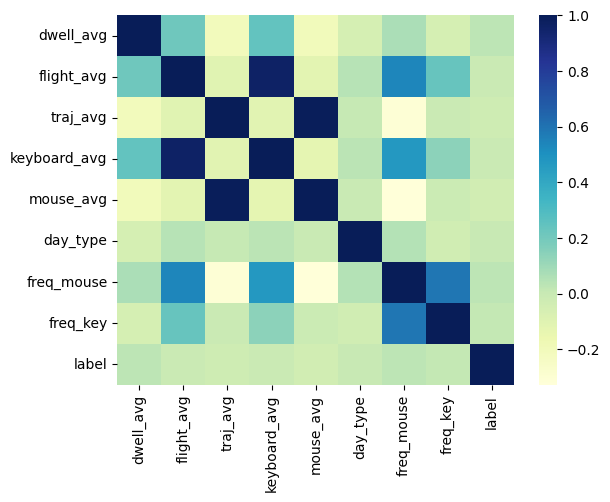

In [8]:
# visualize the correlations

sns.heatmap(correlation, cmap="YlGnBu")

# Check features relationship

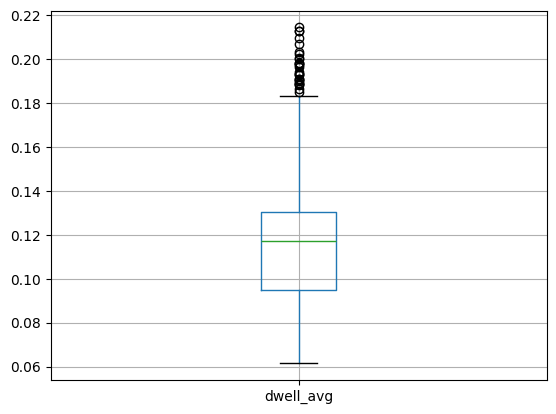

In [9]:
#min max scaling
data[['dwell_avg']].boxplot()
plt.show()

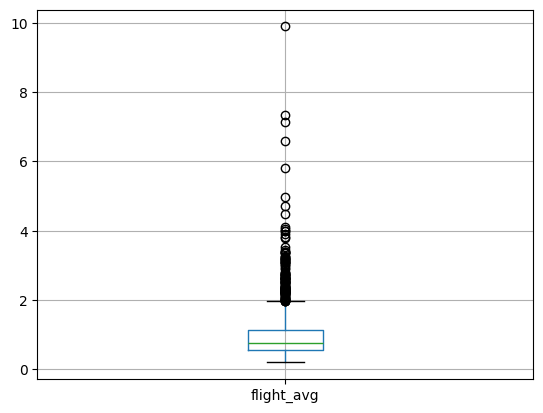

In [10]:
#min max
data[['flight_avg']].boxplot()
plt.show()

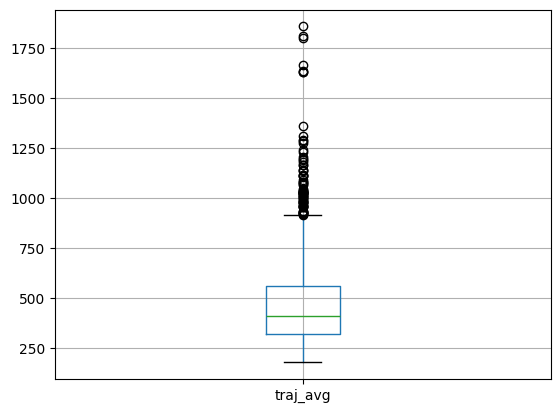

In [11]:
#min max
data[['traj_avg']].boxplot()
plt.show()

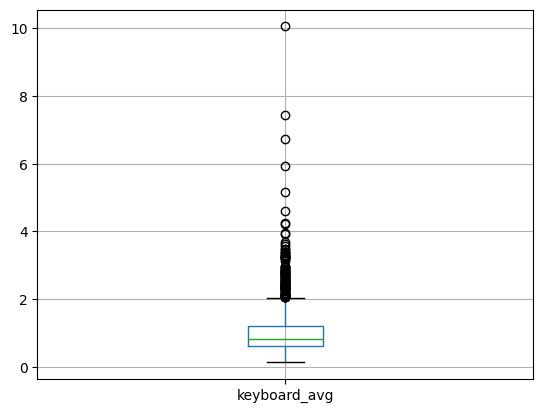

In [12]:
#min max
data[['keyboard_avg']].boxplot()
plt.show()

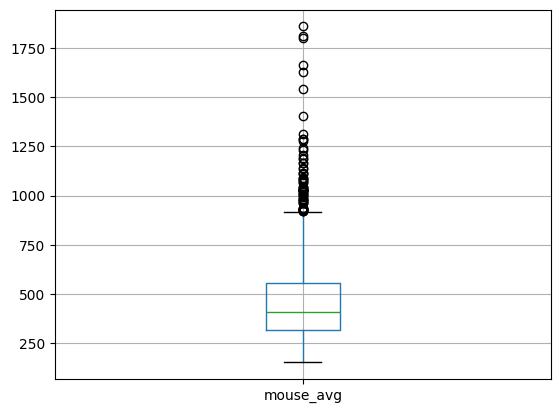

In [13]:
#min max
data[['mouse_avg']].boxplot()
plt.show()

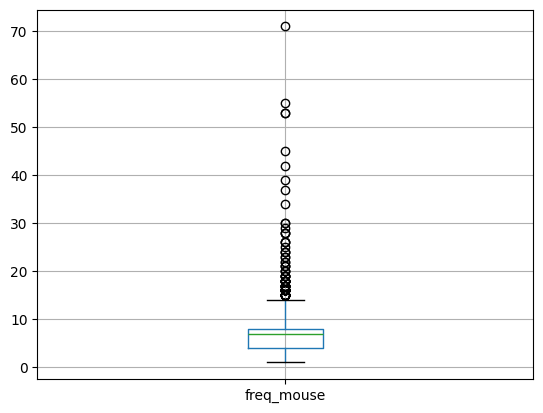

In [14]:
#min max
data[['freq_mouse']].boxplot()
plt.show()

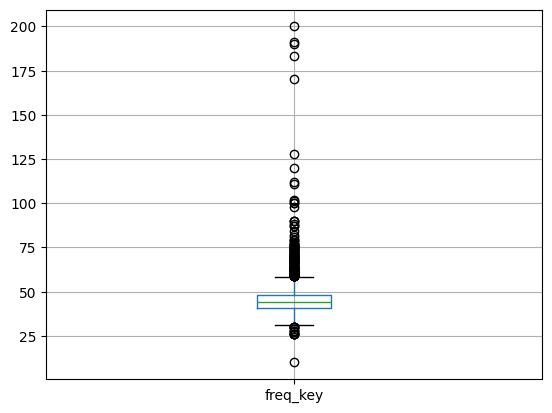

In [15]:
#min max
data[['freq_key']].boxplot()
plt.show()

# Scaling

In [16]:
num_transformer = MinMaxScaler()
cat_transformer = OneHotEncoder()


preproc = make_column_transformer(
    (num_transformer, ['dwell_avg',	'flight_avg', 'traj_avg', 'keyboard_avg', 'mouse_avg', 'freq_mouse', 'freq_key']),
    (cat_transformer, ['day_type'])
)

# Pipeline

In [17]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preproc),
    ('classifier', RandomForestClassifier())
])

rf_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['dwell_avg', 'flight_avg',
                                                   'traj_avg', 'keyboard_avg',
                                                   'mouse_avg', 'freq_mouse',
                                                   'freq_key']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['day_type'])])),
                ('classifier', RandomForestClassifier())])

In [18]:
svc_pipeline = Pipeline(steps=[
    ('preprocessor', preproc),
    ('classifier', SVC())
])

svc_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['dwell_avg', 'flight_avg',
                                                   'traj_avg', 'keyboard_avg',
                                                   'mouse_avg', 'freq_mouse',
                                                   'freq_key']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['day_type'])])),
                ('classifier', SVC())])

In [19]:
#one hot encoder
data[['day_type']].value_counts()

day_type
0.0         1380
1.0          380
Name: count, dtype: int64

# Spliting

In [20]:
#Random forest Model -- default data

# define X and y
X = data.drop(columns='label')
y = data['label']
# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# GridSearch

In [21]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['auto', 'sqrt'],
    'classifier__bootstrap': [True, False]
}

# Create and fit the GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy"
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

/home/lewagon/.pyenv/versions/3.10.6/envs/biosure/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
810 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
810 fits failed with the following error:
Traceback (most recent call last):
  File "/home/lewagon/.pyenv/versions/3.10.6/envs/biosure/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lewagon/.pyenv/versions/3.10.6/envs/biosure/lib/python3.10/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/lewagon/.pyenv/versions/3.10.6/envs/biosure

In [22]:
best_score

np.float64(0.5760051487847354)